## Importing the dataset

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('WEC_Sydney_49.csv')

In [4]:
df.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,1.0,1.0,0.00,70.00,1.00,140.0,50.00,198.0,401.0,1.0,...,71909.82,70674.49,70972.33,90957.03,90903.63,87876.82,79499.23,68880.39,0.78,4065416.61
1,598.0,0.0,595.82,77.69,593.70,150.0,549.00,198.0,798.0,0.0,...,68757.68,70665.50,69963.48,84511.25,85691.70,85211.51,76678.20,76119.53,0.76,3951216.37
2,198.0,0.0,197.46,75.19,192.94,150.0,87.64,198.0,398.0,0.0,...,73675.80,77808.44,73519.82,91436.35,88770.60,86632.78,77932.46,69343.12,0.78,4022640.78
3,598.0,0.0,596.97,69.41,592.69,143.8,549.00,198.0,398.0,200.0,...,68947.21,71668.05,69380.67,85191.27,84453.12,85300.41,78573.25,72527.16,0.75,3879223.41
4,198.0,0.0,197.18,79.83,192.97,150.0,89.53,198.0,398.0,0.0,...,78367.97,79075.06,74354.03,85254.75,86978.69,86951.65,77671.87,74901.38,0.77,3974691.24


In [5]:
df.keys()

Index(['X1', 'Y1', 'X2', 'Y2', 'X3', 'Y3', 'X4', 'Y4', 'X5', 'Y5',
       ...
       'Power42', 'Power43', 'Power44', 'Power45', 'Power46', 'Power47',
       'Power48', 'Power49', 'qW', 'Total_Power'],
      dtype='object', length=149)

## Data cleaning

In [6]:
# checking for missing values
df.isnull().sum()

X1             0
Y1             0
X2             0
Y2             0
X3             0
              ..
Power47        0
Power48        0
Power49        0
qW             0
Total_Power    0
Length: 149, dtype: int64

In [7]:
# detect all string columns
df.dtypes
# df.dtypes == 'object'

X1             float64
Y1             float64
X2             float64
Y2             float64
X3             float64
                ...   
Power47        float64
Power48        float64
Power49        float64
qW             float64
Total_Power    float64
Length: 149, dtype: object

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17959     True
17960     True
17961     True
17962     True
17963     True
Length: 17964, dtype: bool

In [9]:
# checking for duplicates
dr = df[df.duplicated()]
dr

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
31,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,601.0,1.0,...,74568.16,77997.08,74154.58,89272.62,89877.37,87790.83,80610.05,69248.20,0.79,4110398.43
37,198.0,0.0,195.76,77.94,191.75,150.00,89.76,198.0,398.0,0.0,...,81008.48,75171.97,70954.27,94436.98,91675.18,88472.68,78406.32,72328.87,0.78,4039187.39
67,198.0,0.0,197.46,75.65,193.60,144.02,149.00,198.0,398.0,0.0,...,71985.48,69691.48,68470.55,80682.84,82923.38,84546.44,77856.36,76575.36,0.77,4002736.09
81,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,598.0,0.0,...,74063.18,75369.02,70896.78,87322.75,86885.05,87155.99,78393.50,71345.70,0.78,4053977.19
93,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,201.0,1.0,...,74714.58,75550.54,75328.34,91623.63,88479.75,88650.11,80066.00,72209.57,0.79,4082853.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17959,1.0,198.0,50.00,198.00,100.00,198.00,150.00,198.0,201.0,1.0,...,74777.95,75328.19,72050.55,92155.56,89410.09,87942.24,82359.52,69035.90,0.79,4079797.83
17960,398.0,0.0,397.60,72.29,393.00,147.07,349.00,198.0,598.0,0.0,...,70923.77,70611.23,68249.45,90978.35,87013.51,84596.98,76776.71,75651.54,0.75,3909303.33
17961,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,648.0,1.0,...,83075.11,76547.45,76059.62,96899.02,91713.87,88308.28,75781.49,70417.64,0.79,4111341.29
17962,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,648.0,1.0,...,80868.59,76420.36,75312.25,95833.13,92514.46,88406.40,79531.50,70704.51,0.79,4100219.73


## EDA

In [10]:
df.describe()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
count,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000,...,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000,1.796400e+04
mean,138.863588,3.718730,142.885799,66.752149,148.172411,129.354211,114.376961,179.511314,498.462368,4.902778,...,75429.803120,74536.665124,72190.750970,88630.865616,87901.484424,87100.344719,79188.670606,73231.315825,0.776859,4.026608e+06
std,167.910813,28.398116,166.600732,26.712075,166.469037,35.944825,150.754729,33.733832,187.317071,32.833962,...,4591.686796,3177.054267,3125.754817,6203.795685,4116.313991,2669.566780,2887.752940,4419.352655,0.013956,7.070463e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,59476.590000,62909.250000,63097.180000,58426.030000,64699.350000,63228.610000,65675.240000,63575.550000,0.700000,3.625434e+06
25%,1.000000,0.000000,1.000000,51.000000,1.000000,101.000000,1.000000,151.000000,398.000000,0.000000,...,72440.380000,72435.040000,69973.060000,86452.087500,86674.770000,86183.590000,77165.077500,70034.370000,0.770000,3.981420e+06
50%,198.000000,0.000000,195.960000,70.000000,192.360000,143.800000,82.850000,198.000000,401.000000,0.000000,...,75256.940000,74544.595000,72208.780000,89864.590000,89040.170000,87587.270000,78924.360000,73149.000000,0.780000,4.034284e+06
75%,198.000000,1.000000,197.110000,75.650000,193.700000,150.000000,149.000000,198.000000,598.000000,1.000000,...,78095.645000,76572.720000,74250.462500,93273.412500,90637.010000,88578.230000,80838.610000,75713.180000,0.790000,4.083746e+06
max,1000.000000,988.260000,1000.000000,989.650000,1000.000000,990.000000,1000.000000,990.000000,1000.000000,990.000000,...,106876.870000,107133.930000,101385.030000,99223.710000,100955.350000,103323.710000,95130.390000,96532.930000,0.800000,4.145252e+06


In [11]:
for col in df.columns:
    print(col)
    print(df[col].head())
    print()

X1
0      1.0
1    598.0
2    198.0
3    598.0
4    198.0
Name: X1, dtype: float64

Y1
0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Y1, dtype: float64

X2
0      0.00
1    595.82
2    197.46
3    596.97
4    197.18
Name: X2, dtype: float64

Y2
0    70.00
1    77.69
2    75.19
3    69.41
4    79.83
Name: Y2, dtype: float64

X3
0      1.00
1    593.70
2    192.94
3    592.69
4    192.97
Name: X3, dtype: float64

Y3
0    140.0
1    150.0
2    150.0
3    143.8
4    150.0
Name: Y3, dtype: float64

X4
0     50.00
1    549.00
2     87.64
3    549.00
4     89.53
Name: X4, dtype: float64

Y4
0    198.0
1    198.0
2    198.0
3    198.0
4    198.0
Name: Y4, dtype: float64

X5
0    401.0
1    798.0
2    398.0
3    398.0
4    398.0
Name: X5, dtype: float64

Y5
0      1.0
1      0.0
2      0.0
3    200.0
4      0.0
Name: Y5, dtype: float64

X6
0    401.00
1    795.82
2    397.46
3    396.97
4    397.18
Name: X6, dtype: float64

Y6
0     51.00
1     77.69
2     75.19
3    269.41
4     79.83
Nam

In [12]:
for col in df.columns:
    print(col)
    # print only the first 5 values
    # print(df[col].unique()[:5])
    print(df[col].unique())
    print("number of unique values: ",df[col].nunique())
    print()

X1
[1.0000e+00 5.9800e+02 1.9800e+02 0.0000e+00 3.9800e+02 4.8000e+01
 1.2000e+01 7.9800e+02 5.0000e+01 1.5000e+02 2.0000e+00 1.6554e+02
 9.9800e+02 1.0100e+02 1.0000e+02 7.6800e+00 5.2080e+01 4.0000e+01
 4.0000e+00 1.4592e+02 8.5000e+02 3.0000e+02 1.2100e+00 1.0710e+01
 7.0000e+02 3.5000e+02 9.2647e+02 1.1441e+02 1.6250e+01 1.5250e+01
 2.2488e+02 5.6800e+00 9.5800e+00 2.0000e+02 2.1640e+02 6.8887e+02
 4.1180e+01 1.5200e+00 5.6020e+01 6.6706e+02 3.9000e-01 8.0000e-02
 5.5000e+02 5.2950e+01 3.4275e+02 5.0000e+02 3.7632e+02 6.9000e-01
 4.9500e+02 8.6690e+01 5.9594e+02 6.0000e+02 2.3780e+01 5.5273e+02
 3.2950e+01 1.0655e+02 2.3740e+01 2.5000e+02 4.5150e+01 1.0000e+03
 1.4543e+02 5.1156e+02 8.7110e+01 9.5700e+00 8.4064e+02 1.2568e+02
 3.7403e+02 8.9259e+02 1.1600e+01 9.0775e+02 2.4600e+01 8.0000e+02
 2.6760e+02 6.8926e+02 8.3716e+02 6.0070e+01 2.1000e+01 4.0420e+01]
number of unique values:  78

Y1
[1.0000e+00 0.0000e+00 1.9800e+02 1.4129e+02 5.0000e+01 9.8826e+02
 2.0000e+02 7.1750e+01 1.

### analysing the histoplot

Text(0.5, 1.0, 'Total Power Output Distribution')

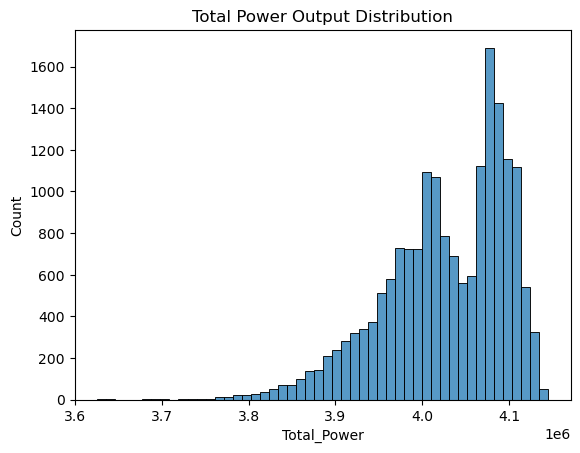

In [52]:
# checking the distribution of the total power output
sns.histplot(df.Total_Power, bins=50)
plt.title("Total Power Output Distribution")

this histogram suggests the dataset might be skewed slightly toward higher power outputs

### analysing boxplot

Text(0.5, 1.0, 'Total Power Output Boxplot')

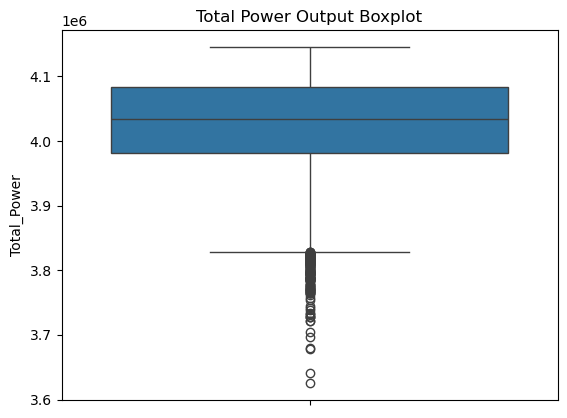

In [53]:
# Identifying outliers in the total power output
sns.boxplot(data=df['Total_Power'])
plt.title("Total Power Output Boxplot")

### handling the skewness

Text(0.5, 1.0, 'Total Power Output Distribution after Normalization')

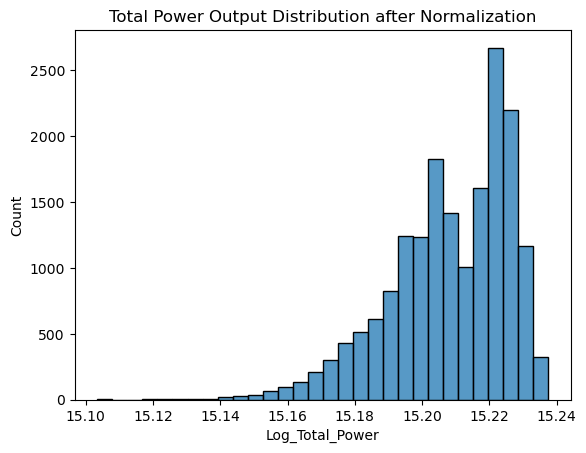

In [54]:
# normalizing the total power by adding logarithm
df['Log_Total_Power'] = np.log1p(df['Total_Power'])
sns.histplot(df['Log_Total_Power'], bins=30)
plt.title("Total Power Output Distribution after Normalization")

In [ ]:
# Combining data for comparison
low_high_power = pd.concat([low_power_rows, high_power_rows])
low_high_power['Power_Type'] = ['Low' if p < low_threshold else 'High' for p in low_high_power['Total_Power']]

sns.boxplot(x='Power_Type', y='qW', data=low_high_power)
plt.title("Q-Factor for Low vs. High Power Rows")
plt.show()

Text(0.5, 1.0, 'Relationship between X1 and Power1')

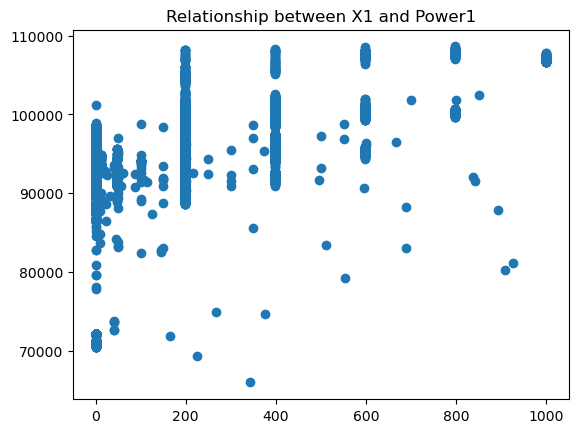

In [55]:
# plotting the relationship between x1 and power1
plt.scatter(df['X1'], df['Power1'])
plt.title("Relationship between X1 and Power1")

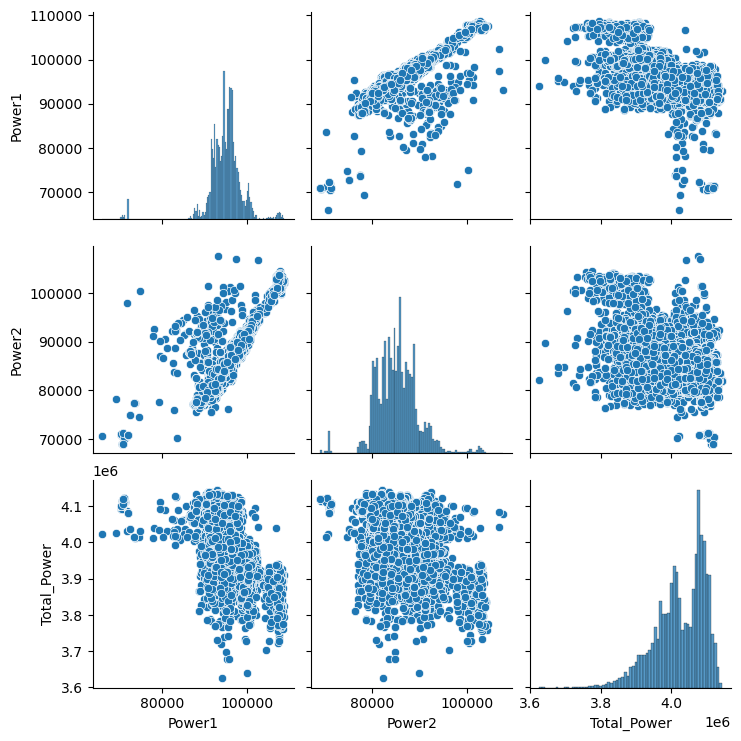

In [19]:
sns.pairplot(df[['Power1', 'Power2', 'Total_Power']])

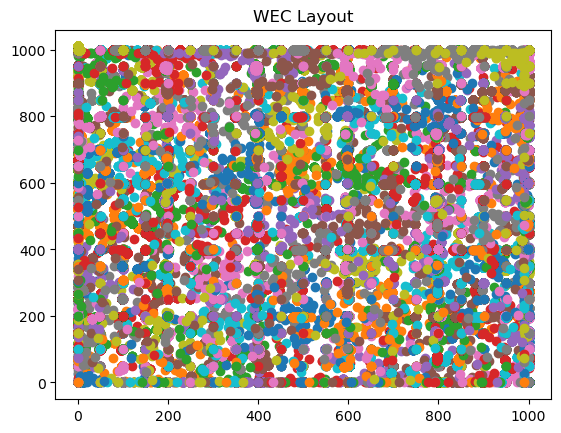

In [20]:
# Plotting the coordinates of the WECs
for i in range(1, 50): 
    plt.scatter(df[f'X{i}'], df[f'Y{i}'])
plt.title("WEC Layout")
plt.show()

In [23]:
# Extracting all the X and Y columns
x_columns = [col for col in df.columns if col.startswith('X')]
y_columns = [col for col in df.columns if col.startswith('Y')]

In [24]:
# Calculating the distances between WECs and a central point:
# Calculating the central position
central_x = df[x_columns].mean().mean()  # Mean across all X columns
central_y = df[y_columns].mean().mean()  # Mean across all Y columns

# Calculating the distance to the center for each WEC coordinate
for x_col, y_col in zip(x_columns, y_columns):
    df[f'Distance_to_Center_{x_col}'] = np.sqrt((df[x_col] - central_x) ** 2 + (df[y_col] - central_y) ** 2)

In [25]:
# Scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Total_Power', axis=1))

## Handling the outliers

In [26]:
# Calculating Q1, Q3, and IQR
Q1 = df['Total_Power'].quantile(0.25)
Q3 = df['Total_Power'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df[(df['Total_Power'] < lower_bound) | (df['Total_Power'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

Number of outliers: 184


In [27]:
# flagging outliers 
Q1 = df['Total_Power'].quantile(0.25)
Q3 = df['Total_Power'].quantile(0.75)
IQR = Q3 - Q1
df['Outlier'] = ((df['Total_Power'] < (Q1 - 1.5 * IQR)) | 
                 (df['Total_Power'] > (Q3 + 1.5 * IQR)))

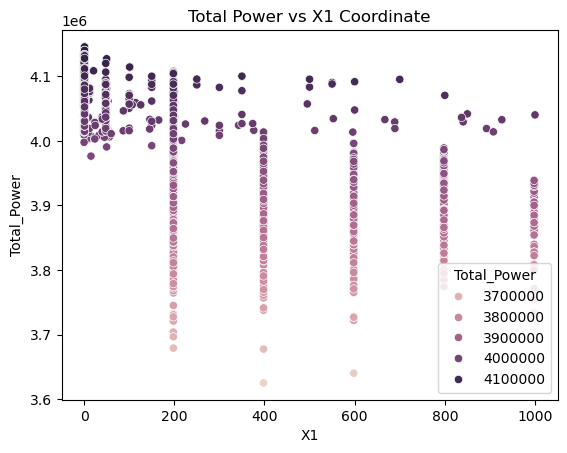

In [28]:
# Scatterplot of Total Power vs X1 Coordinate
sns.scatterplot(data=df, x='X1', y='Total_Power', hue='Total_Power')
plt.title('Total Power vs X1 Coordinate')
plt.show()

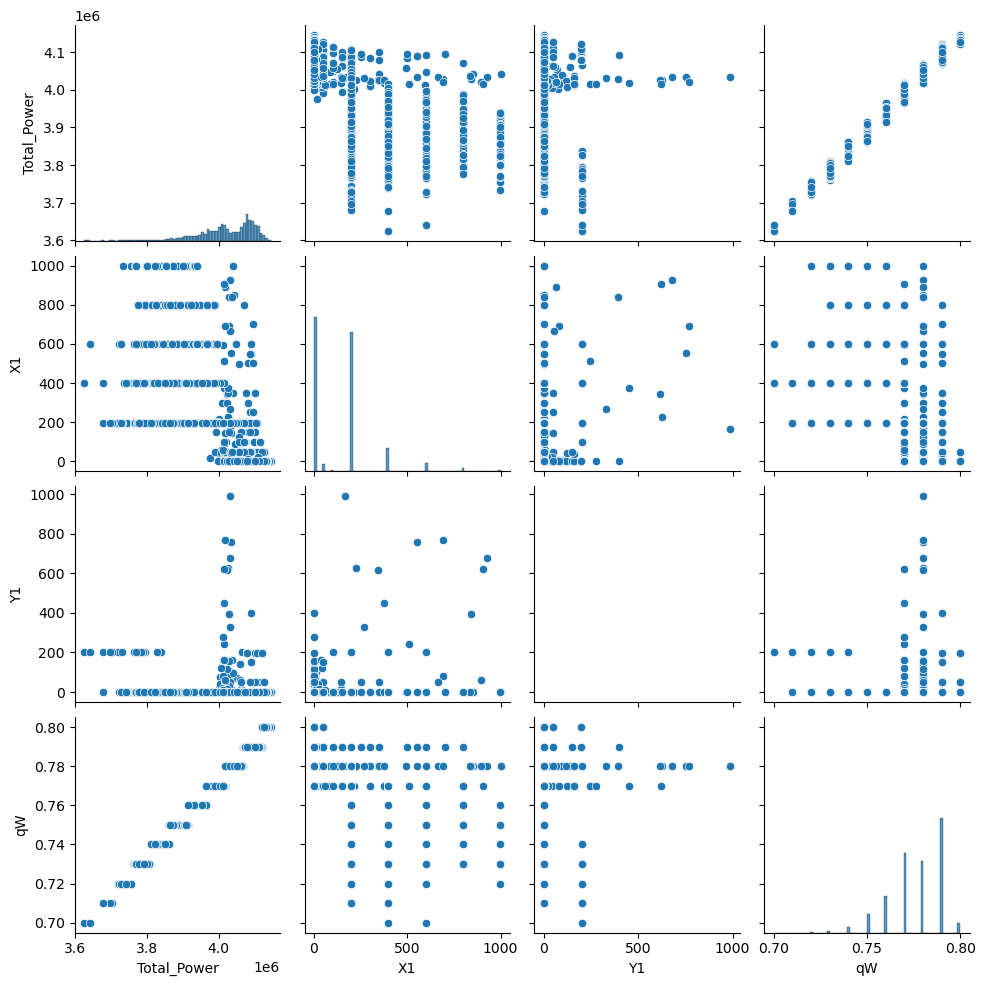

In [29]:
sns.pairplot(df[['Total_Power', 'X1', 'Y1', 'qW']])
plt.show()

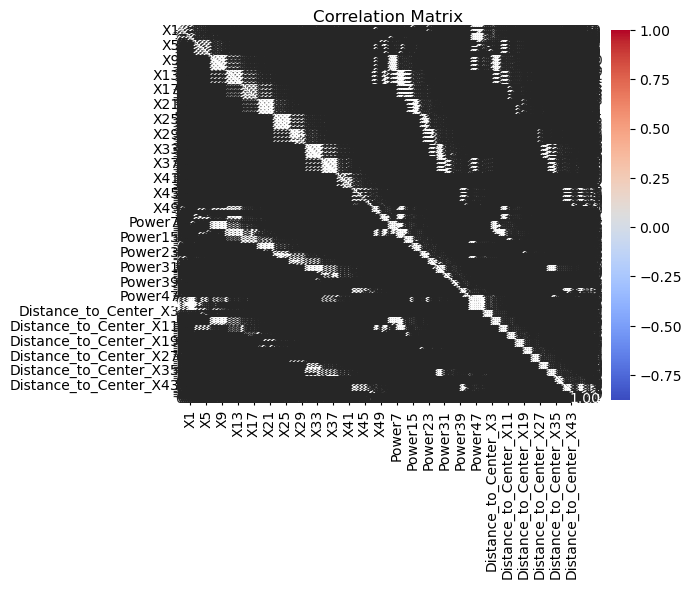

In [30]:
# Correlation Heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

some predictors are highly correlated

- Clustering Analysis

In [32]:
# Grouping WECs and exploring their impact on Total_Power
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.1, min_samples=5).fit(df[['X', 'Y']])
df['Cluster'] = clustering.labels_

KeyError: "None of [Index(['X', 'Y'], dtype='object')] are in the [columns]"

## model building

In [34]:
from sklearn.linear_model import LinearRegression
X = df.drop(['Total_Power', 'Outlier'], axis=1)
y = df['Total_Power']
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [35]:
# Setting up the validation framework
from sklearn.model_selection import KFold, cross_val_score

# Defining the model
model = LinearRegression()

# Setting up K-Fold Cross-Validation (e.g., 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Performing Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Printing Results
mse_scores = -cv_scores  # Convert negative MSE to positive
print("MSE for each fold:", mse_scores)
print("Average MSE:", np.mean(mse_scores))

MSE for each fold: [26307.60400965 26500.6720455  25568.32841401 31563.82280733
 31088.08209462]
Average MSE: 28205.701874222497


In [36]:
# First split into training + temp (validation + test)
from sklearn.model_selection import train_test_split
train, temp = train_test_split(df, test_size=0.4, random_state=42)

# Splitting temp into validation and test
validation, test = train_test_split(temp, test_size=0.5, random_state=42)

# Verifying the sizes
print(f"Training set: {train.shape}")
print(f"Validation set: {validation.shape}")
print(f"Test set: {test.shape}")

Training set: (10778, 200)
Validation set: (3593, 200)
Test set: (3593, 200)


## Feautre engineering

In [37]:
# Extracting all the X and Y columns
x_columns = [col for col in train.columns if col.startswith('X')]
y_columns = [col for col in train.columns if col.startswith('Y')]

In [38]:
# Computing central points for all X and Y columns
central_x = {col: train[col].mean() for col in x_columns}
central_y = {col: train[col].mean() for col in y_columns}

# Calculating distances for all pairs of X and Y
for x_col, y_col in zip(x_columns, y_columns):
    train[f'Distance_to_Center_{x_col}'] = np.sqrt(
        (train[x_col] - central_x[x_col])**2 + (train[y_col] - central_y[y_col])**2
    )
    test[f'Distance_to_Center_{x_col}'] = np.sqrt(
        (test[x_col] - central_x[x_col])**2 + (test[y_col] - central_y[y_col])**2
    )

In [39]:
# Creating interaction terms for each X and Y column
for x_col, y_col in zip(x_columns, y_columns):
    train[f'qW_{x_col}'] = train['qW'] * train[x_col]
    train[f'qW_{y_col}'] = train['qW'] * train[y_col]
    
    test[f'qW_{x_col}'] = test['qW'] * test[x_col]
    test[f'qW_{y_col}'] = test['qW'] * test[y_col]

C:\Users\victoria\AppData\Local\Temp\ipykernel_5400\979723154.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f'qW_{x_col}'] = train['qW'] * train[x_col]
C:\Users\victoria\AppData\Local\Temp\ipykernel_5400\979723154.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f'qW_{y_col}'] = train['qW'] * train[y_col]
C:\Users\victoria\AppData\Local\Temp\ipykernel_5400\979723154.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principal_components = pca.fit_transform(scaled_features)

## Training the models

In [41]:
# Dynamically identifying all 'X' and 'Y' features
baseline_features = [col for col in train.columns if col.startswith('X') or col.startswith('Y')]
spatial_features = [col for col in train.columns if col.startswith('Distance_to_Center')]
interaction_features = [col for col in train.columns if col.startswith('qW_X') or col.startswith('qW_Y')]

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def train_and_evaluate(features, target, train, test):
    # Filter valid features
    features = [f for f in features if f in train.columns]
    if not features:
        print("No valid features available for training.")
        return None

    model = LinearRegression()

    # Train the model
    model.fit(train[features], train[target])

    # Predict on test set
    predictions = model.predict(test[features])

    # Evaluate performance
    mse = mean_squared_error(test[target], predictions)
    r2 = r2_score(test[target], predictions)

    print(f"Features: {features}")
    print(f"Mean Squared Error: {mse}")
    print(f"R² Score: {r2}\n")
    return model



# Define the target variable
target = 'Total_Power'

# Evaluate each feature set
train_and_evaluate(baseline_features, target, train, test)
train_and_evaluate(spatial_features, target, train, test)
train_and_evaluate(interaction_features, target, train, test)

Features: ['X1', 'Y1', 'X2', 'Y2', 'X3', 'Y3', 'X4', 'Y4', 'X5', 'Y5', 'X6', 'Y6', 'X7', 'Y7', 'X8', 'Y8', 'X9', 'Y9', 'X10', 'Y10', 'X11', 'Y11', 'X12', 'Y12', 'X13', 'Y13', 'X14', 'Y14', 'X15', 'Y15', 'X16', 'Y16', 'X17', 'Y17', 'X18', 'Y18', 'X19', 'Y19', 'X20', 'Y20', 'X21', 'Y21', 'X22', 'Y22', 'X23', 'Y23', 'X24', 'Y24', 'X25', 'Y25', 'X26', 'Y26', 'X27', 'Y27', 'X28', 'Y28', 'X29', 'Y29', 'X30', 'Y30', 'X31', 'Y31', 'X32', 'Y32', 'X33', 'Y33', 'X34', 'Y34', 'X35', 'Y35', 'X36', 'Y36', 'X37', 'Y37', 'X38', 'Y38', 'X39', 'Y39', 'X40', 'Y40', 'X41', 'Y41', 'X42', 'Y42', 'X43', 'Y43', 'X44', 'Y44', 'X45', 'Y45', 'X46', 'Y46', 'X47', 'Y47', 'X48', 'Y48', 'X49', 'Y49']
Mean Squared Error: 1024535494.6341537
R² Score: 0.7899587682879898

Features: ['Distance_to_Center_X1', 'Distance_to_Center_X2', 'Distance_to_Center_X3', 'Distance_to_Center_X4', 'Distance_to_Center_X5', 'Distance_to_Center_X6', 'Distance_to_Center_X7', 'Distance_to_Center_X8', 'Distance_to_Center_X9', 'Distance_to_Cen

LinearRegression()

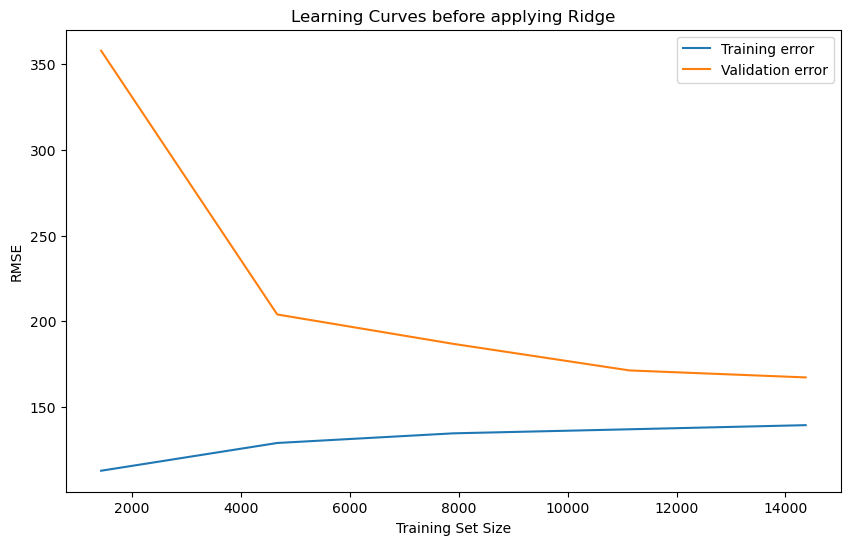

In [56]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curves before applying Ridge')
plt.legend()
plt.show()

In [44]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

def train_and_evaluate_regularized(features, target, train, test, alpha=1.0, method='ridge'):
    if method == 'ridge':
        model = Ridge(alpha=alpha)
    elif method == 'lasso':
        model = Lasso(alpha=alpha)
    else:
        raise ValueError("Method must be 'ridge' or 'lasso'.")

    model.fit(train[features], train[target])
    predictions = model.predict(test[features])

    mse = mean_squared_error(test[target], predictions)
    r2 = r2_score(test[target], predictions)

    print(f"Regularized Model ({method.title()}):")
    print(f"Alpha: {alpha}")
    print(f"Mean Squared Error: {mse}")
    print(f"R² Score: {r2}")
    return model

# Example usage
alpha = 0.1
ridge_model = train_and_evaluate_regularized(baseline_features, target, train, test, alpha, method='ridge')
lasso_model = train_and_evaluate_regularized(baseline_features, target, train, test, alpha, method='lasso')

Regularized Model (Ridge):
Alpha: 0.1
Mean Squared Error: 1024535426.1541561
R² Score: 0.789958782327155
Regularized Model (Lasso):
Alpha: 0.1
Mean Squared Error: 1028548047.7302369
R² Score: 0.7891361500390124


C:\Users\victoria\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.666e+12, tolerance: 5.328e+09
  model = cd_fast.enet_coordinate_descent(


Training Sizes: [ 862 1724 2586 3448 4311 5173 6035 6897 7759 8622]
Train RMSE: [19162.54884018 19882.76495717 20127.84492398 20573.71416601
 20846.63212205 21186.68164351 21554.81116186 21660.57893642
 21864.73406863 21994.40463061]
Validation RMSE: [42540.09546437 34953.76554475 34164.98522648 29399.91493273
 29848.0551134  29233.65602538 28410.41407146 27493.84145335
 27073.83230279 26727.67965152]


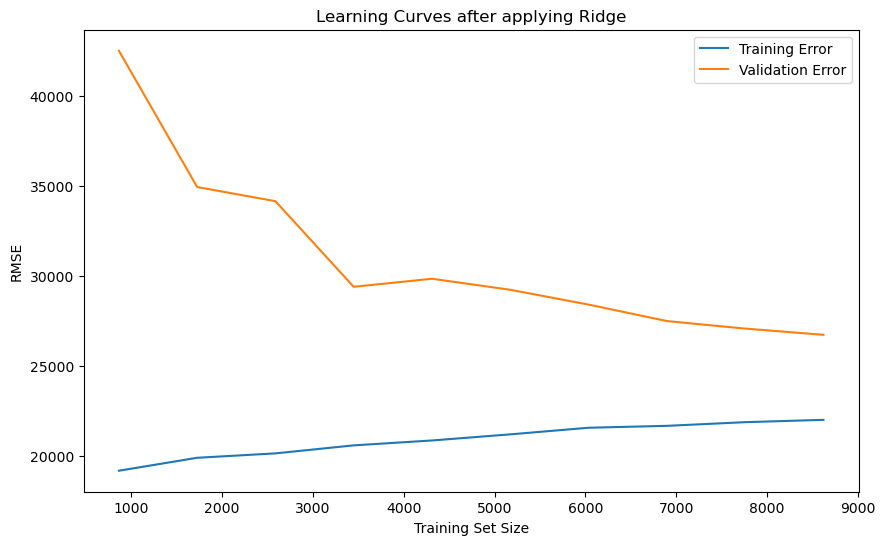

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curves(model, X, y):
    # Calculate learning curve
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error'
    )

    # Calculate RMSE
    train_rmse = (-np.mean(train_scores, axis=1)) ** 0.5
    val_rmse = (-np.mean(val_scores, axis=1)) ** 0.5

    # Debugging
    print("Training Sizes:", train_sizes)
    print("Train RMSE:", train_rmse)
    print("Validation RMSE:", val_rmse)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_rmse, label="Training Error")
    plt.plot(train_sizes, val_rmse, label="Validation Error")
    plt.xlabel("Training Set Size")
    plt.ylabel("RMSE")
    plt.title("Learning Curves after applying Ridge")
    plt.legend()
    plt.show()

# Example usage
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Scale features (if not already scaled)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train[baseline_features])

model = LinearRegression()
plot_learning_curves(model, X_scaled, train[target])